In [1]:
import pandas as pd  
import numpy as np  


In [2]:
"""
Script to train and save the model for deployment
Run this after training your model in the notebook
"""

import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have your trained model and vectorizer from the notebook
# After running your notebook training cells, add this code:

def save_model(model, tfidf_vectorizer, model_path='model.pkl', vectorizer_path='tfidf_vectorizer.pkl'):
    """
    Save the trained model and vectorizer to disk
    
    Args:
        model: Trained sklearn model
        tfidf_vectorizer: Fitted TfidfVectorizer
        model_path: Path to save the model
        vectorizer_path: Path to save the vectorizer
    """
    # Save model
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {model_path}")
    
    # Save vectorizer
    with open(vectorizer_path, 'wb') as f:
        pickle.dump(tfidf_vectorizer, f)
    print(f"Vectorizer saved to {vectorizer_path}")

def load_model(model_path='model.pkl', vectorizer_path='tfidf_vectorizer.pkl'):
    """
    Load the trained model and vectorizer from disk
    
    Args:
        model_path: Path to the saved model
        vectorizer_path: Path to the saved vectorizer
        
    Returns:
        model, tfidf_vectorizer
    """
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    print(f"Model loaded from {model_path}")
    
    with open(vectorizer_path, 'rb') as f:
        tfidf_vectorizer = pickle.load(f)
    print(f"Vectorizer loaded from {vectorizer_path}")
    
    return model, tfidf_vectorizer

# Example usage (add this to your notebook after training):
"""
# After training your model:
# model = LogisticRegression()
# model.fit(x_train, y_train)

# Save the model and vectorizer
save_model(model, tfidf)

# To load later:
# loaded_model, loaded_tfidf = load_model()
"""

if __name__ == "__main__":
    print("This script provides functions to save and load your trained model.")
    print("\nTo save your model, add this to your notebook after training:")
    print("""
import pickle

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved successfully!")
    """)

This script provides functions to save and load your trained model.

To save your model, add this to your notebook after training:

import pickle

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved successfully!")
    


In [3]:
df = pd.read_csv('train.csv' , names=['polarity' , 'review text' , 'review body'])

In [4]:
df

,polarity,review text,review body
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It ...


In [5]:
df = df.head(50000)

In [6]:
df

,polarity,review text,review body
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
49995,1,From M.E. student,This digital caliper sucks! First off you have...
49996,2,Amazingly nice for the price! Works great!,I didn't expect much. It's cheap. What I got i...
49997,1,Save your money,Not accurate at all. You can measure the same ...
49998,2,great buy...,"good price, fast shipping! what more could you..."


In [7]:
df.isnull().sum()

polarity       0
review text    5
review body    0
dtype: int64

In [8]:
df.dropna(inplace=True)

/tmp/ipykernel_2158/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [9]:
df.duplicated().sum()

0

In [10]:
df.iloc[22]

polarity                                                       1
review text                         Another Abysmal Digital Copy
review body    Rather than scratches and insect droppings, th...
Name: 22, dtype: object

In [11]:
# removing html tags
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?.'),'',raw_text)
    return cleaned_text

In [12]:
df['review body'] = df['review body'].apply(remove_tags)

/tmp/ipykernel_2158/1612147016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review body'] = df['review body'].apply(remove_tags)


In [13]:
df['review text'] = df['review text'].apply(remove_tags)

/tmp/ipykernel_2158/2980368926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review text'] = df['review text'].apply(remove_tags)


In [14]:
df['review body'] = df['review body'].apply(lambda x : x.lower())

/tmp/ipykernel_2158/2060881178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review body'] = df['review body'].apply(lambda x : x.lower())


In [15]:
df['review text'] = df['review text'].apply(lambda x : x.lower())

/tmp/ipykernel_2158/3540271390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review text'] = df['review text'].apply(lambda x : x.lower())


In [16]:
def remove_punctuation(string):
    string = re.sub(r'[^\w\s]','',string)
    return string

In [17]:
df['review body'] = df['review body'].apply(remove_punctuation)

/tmp/ipykernel_2158/601444661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review body'] = df['review body'].apply(remove_punctuation)


In [18]:
df['review text'] = df['review text'].apply(remove_punctuation)

/tmp/ipykernel_2158/502429941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review text'] = df['review text'].apply(remove_punctuation)


In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_list = stopwords.words('english')

df['review body'] = df['review body'].apply(lambda x : [item for item in x.split() if item not in sw_list]).apply(lambda x : " ".join(x))
df['review text'] = df['review text'].apply(lambda x : [item for item in x.split() if item not in sw_list]).apply(lambda x : " ".join(x))

[nltk_data] Downloading package stopwords to /home/swaraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_2158/1258226626.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review body'] = df['review body'].apply(lambda x : [item for item in x.split() if item not in sw_list]).apply(lambda x : " ".join(x))
/tmp/ipykernel_2158/1258226626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review text'] = df['review text'].apply(lambda x : [item for item in x.split()

In [20]:
df

,polarity,review text,review body
0,2,stuning even nongamer,sound track beautiful paints senery mind well ...
1,2,best soundtrack ever anything,im reading lot reviews saying best game soundt...
2,2,amazing,soundtrack favorite music time hands intense s...
3,2,excellent soundtrack,truly like soundtrack enjoy video game music p...
4,2,remember pull jaw floor hearing,youve played game know divine music every sing...
...,...,...,...
49995,1,student,digital caliper sucks first extend caliper ext...
49996,2,amazingly nice price works great,didnt expect much cheap got nice tool feels su...
49997,1,save money,accurate measure thing 10x get ten vastly diff...
49998,2,great buy,good price fast shipping could want serves pur...


In [21]:
from symspellpy.symspellpy import SymSpell, Verbosity


sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
sym_spell.load_dictionary("frequency_dictionary_en_82_765.txt", term_index=0, count_index=1)


def correct_text(text):
    corrected_words = []
    for word in text.split():
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        corrected_words.append(suggestions[0].term if suggestions else word)
    return ' '.join(corrected_words)


df['review body'] = df['review body'].apply(correct_text)
df['review text'] = df['review text'].apply(correct_text)




2025-10-07 19:43:58,456: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.


/tmp/ipykernel_2158/176011176.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review body'] = df['review body'].apply(correct_text)
/tmp/ipykernel_2158/176011176.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review text'] = df['review text'].apply(correct_text)


In [22]:
df

,polarity,review text,review body
0,2,stuning even nongamer,sound track beautiful paints senery mind well ...
1,2,best soundtrack ever anything,im reading lot reviews saying best game soundt...
2,2,amazing,soundtrack favorite music time hands intense s...
3,2,excellent soundtrack,truly like soundtrack enjoy video game music p...
4,2,remember pull jaw floor hearing,youve played game know divine music every sing...
...,...,...,...
49995,1,student,digital caliper sucks first extend caliper ext...
49996,2,amazingly nice price works great,didnt expect much cheap got nice tool feels su...
49997,1,save money,accurate measure thing 10x get ten vastly diff...
49998,2,great buy,good price fast shipping could want serves pur...


In [23]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [24]:
def POS_TAGGIN(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])
#     In spaCy, nlp(text) does both at once:
# It tokenizes the text

# Applies POS tagging

# Provides lemmas based on those POS tags

# So, you don’t need to run them separately. You can directly access token.lemma_ after nlp(text) because it already uses the correct POS under the hood.



In [25]:
df['review body'] = df['review body'].apply(POS_TAGGIN)
df['review text'] = df['review text'].apply(POS_TAGGIN)

/tmp/ipykernel_2158/4154488558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review body'] = df['review body'].apply(POS_TAGGIN)
/tmp/ipykernel_2158/4154488558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review text'] = df['review text'].apply(POS_TAGGIN)


In [26]:
import gensim
from gensim.models import Word2Vec , KeyedVectors

In [27]:
df['review'] = df['review text'] + ' ' + df['review body']

/tmp/ipykernel_2158/4069315907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review text'] + ' ' + df['review body']


In [28]:
df = df.drop(columns=['review text' , 'review body'])

In [29]:
df

,polarity,review
0,2,stun even nongamer sound track beautiful paint...
1,2,good soundtrack ever anything I m read lot rev...
2,2,amazing soundtrack favorite music time hand in...
3,2,excellent soundtrack truly like soundtrack enj...
4,2,remember pull jaw floor hearing you ve play ga...
...,...,...
49995,1,student digital caliper suck first extend cali...
49996,2,amazingly nice price work great do not expect ...
49997,1,save money accurate measure thing 10x get ten ...
49998,2,great buy good price fast shipping could want ...


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_features = 5000 , ngram_range=(1 , 2))
x = tfidf.fit_transform(df['review'])

y = df['polarity']


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42)


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()
model.fit(x_train , y_train)
model.score(x_test , y_test)


0.8792879287928793

In [35]:
y_pred = model.predict(x_test)

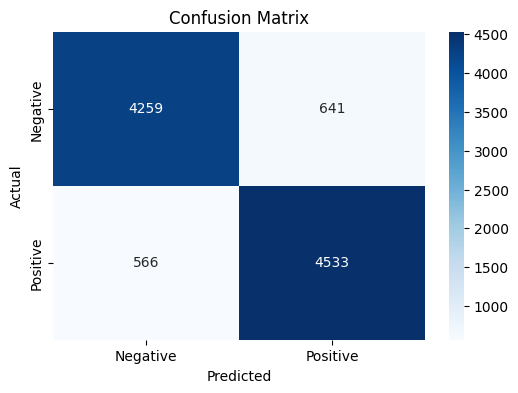

Classification Report:

              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88      4900
    Positive       0.88      0.89      0.88      5099

    accuracy                           0.88      9999
   macro avg       0.88      0.88      0.88      9999
weighted avg       0.88      0.88      0.88      9999



In [39]:
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have these:
# y_test -> true labels
# y_pred -> predictions from your model

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. Precision, Recall, F1-score
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [40]:
y_pred = model.predict(x_test)

In [41]:
accuracy_score(y_true=y_test , y_pred=y_pred)

0.8792879287928793

In [42]:

import pickle

# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

In [ ]:
model = svm.SVC()

In [ ]:
model.fit(x_train , y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test)
accuracy_score(y_true=y_test , y_pred=y_pred)

0.8836883688368837

NameError: name 'y_test' is not defined

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
rf.score(x_test , y_test )

0.8462846284628462

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import  SVC
voting_model = VotingClassifier(
    estimators = [
        ( 'lr' , LogisticRegression()),
        ('rf' , RandomForestClassifier()),
        ('svc' , SVC(probability = True))
    ],
    voting = 'soft'
)

In [ ]:
voting_model.fit(x_train , y_train)

In [ ]:
voting_model.score(x_test , y_test)

0.851

In [ ]:
df['polarity'].value_counts()
# not imbalanced

polarity
1    5097
2    4903
Name: count, dtype: int64

In [ ]:
# tokenization
df['tokens'] = df['review'].apply(lambda x : x.split())

In [ ]:
sentences = df['tokens'].tolist()

model = Word2Vec(sentences , vector_size=100 , window=5 , min_count=1 ,workers=4 , sg=1)

In [ ]:
def get_avg_vector(tokens , model):
    valid_tokens = [token for token in tokens if token in model.wv]
    if not valid_tokens:
        return np.zeroes(model.vector_size)
    return np.mean([model.wv[token] for token in valid_tokens] , axis=0)

df['w2v_vector'] = df['tokens'].apply(lambda x : get_avg_vector(x , model))

In [ ]:
df

,polarity,review,tokens,w2v_vector
0,2,stunning even nongamer sound track beautiful p...,"[stunning, even, nongamer, sound, track, beaut...","[-0.20443283, -0.12838943, 0.063613504, 0.1305..."
1,2,good soundtrack ever anything in read lot revi...,"[good, soundtrack, ever, anything, in, read, l...","[-0.17591815, -0.011801183, 0.023593739, 0.129..."
2,2,amazing soundtrack favourite music time hand i...,"[amazing, soundtrack, favourite, music, time, ...","[-0.21317902, -0.08055073, 0.07662423, 0.13592..."
3,2,excellent soundtrack truly like soundtrack enj...,"[excellent, soundtrack, truly, like, soundtrac...","[-0.192137, -0.08368736, 0.11052607, 0.1220059..."
4,2,remember pull jaw floor hearing you play game ...,"[remember, pull, jaw, floor, hearing, you, pla...","[-0.19609009, -0.026174776, 0.082610875, 0.123..."
...,...,...,...,...
9995,2,revelation life small town america early 1900s...,"[revelation, life, small, town, america, early...","[-0.24574189, 0.14384931, 0.12566474, 0.120776..."
9996,2,great biography interesting journalist biograp...,"[great, biography, interesting, journalist, bi...","[-0.24396148, 0.09939833, 0.1455861, 0.1096268..."
9997,1,interesting subject poor presentation you hard...,"[interesting, subject, poor, presentation, you...","[-0.25294393, 0.15397018, 0.11000526, 0.118787..."
9998,1,do buy box look use obviously new try contact ...,"[do, buy, box, look, use, obviously, new, try,...","[-0.13363267, -0.014127479, 0.034681816, -0.06..."


In [ ]:
y = df['polarity'].values
# numpy array

In [ ]:
y


array([2, 2, 2, ..., 1, 1, 2])

In [ ]:
x = np.vstack(df['w2v_vector'].values)

In [ ]:
x


array([[-0.20443283, -0.12838943,  0.0636135 , ..., -0.26111963,
         0.13547306, -0.07064369],
       [-0.17591815, -0.01180118,  0.02359374, ..., -0.19896299,
         0.24180946, -0.09909558],
       [-0.21317902, -0.08055073,  0.07662423, ..., -0.18856482,
         0.14311741, -0.07102079],
       ...,
       [-0.25294393,  0.15397018,  0.11000526, ..., -0.21950729,
         0.15016297, -0.09546839],
       [-0.13363267, -0.01412748,  0.03468182, ..., -0.12189999,
         0.4288349 , -0.04814767],
       [-0.1311149 , -0.04316008,  0.06823985, ..., -0.11699132,
         0.22867496, -0.09600971]], dtype=float32)

In [ ]:
x[0
]

array([-0.20443283, -0.12838943,  0.0636135 ,  0.13052678,  0.18097414,
       -0.5135226 ,  0.17745803,  0.31179124, -0.3077833 , -0.43113843,
       -0.06380569, -0.27077645, -0.14458907,  0.16156891,  0.20803846,
       -0.12977831,  0.06926419, -0.13871866,  0.03032759, -0.24813725,
        0.03561029,  0.10483672,  0.05543492,  0.09229593,  0.01430895,
        0.08460318, -0.27036902,  0.05492897, -0.32637322,  0.15116364,
        0.23904309,  0.02171305,  0.14518468, -0.1673461 , -0.1867715 ,
        0.37737378, -0.10229988, -0.14744622, -0.12086982, -0.43055496,
        0.06571031, -0.17703427,  0.11551647, -0.00191158,  0.19696112,
       -0.08991288, -0.186125  , -0.01450691,  0.21185833,  0.19818197,
        0.17504498, -0.25137526,  0.05070688, -0.19322   , -0.23912616,
       -0.05757131,  0.07086848, -0.01707895, -0.2850834 ,  0.19615747,
        0.05923493, -0.03768481,  0.15910496, -0.06136885, -0.34484327,
        0.26510903,  0.09996619,  0.23597378, -0.17734818,  0.23

In [ ]:
from sklearn.model_selection import  train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
y_pred =  rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test , y_pred)

0.79

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train , y_train)

/home/swaraj/projects/AmazonReviews/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
accuracy_score(y_test , y_pred)

0.8265

In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC()

In [ ]:
model.fit(x_train , y_train)

SVC()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score(y_test , y_pred)

0.815